In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw1= pd.read_csv("IoTPond6.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,created_at,entry_id,Temperature(C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:01:46 UTC,1972.0,23.5000,30.0,0.723,9.02832,5.91560,285.0,75,7.3,3.2
1,2021-06-19 00:02:05 UTC,1973.0,23.5000,29.0,0.008,8.98746,5.80338,290.0,75,7.3,3.2
2,2021-06-19 00:05:01 UTC,1982.0,23.4375,29.0,1.365,9.04647,5.65000,302.0,75,7.3,3.2
3,2021-06-19 00:10:14 UTC,1998.0,23.4375,30.0,0.249,9.06009,5.54304,289.0,75,7.3,3.2
4,2021-06-19 00:35:35 UTC,2072.0,23.4375,30.0,1.892,9.11910,4.79604,297.0,75,7.3,3.2


In [4]:
df_raw1.columns=['created_at', 'entry_id','Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight']

In [5]:
df_raw1.drop("entry_id",axis=1,inplace=True)

In [6]:
df_raw1.dtypes

created_at           object
Temperature         float64
Turbidity           float64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate             float64
Population            int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

In [7]:
df_raw1.iloc[91015]

created_at          23/10/2021
Temperature                NaN
Turbidity                  NaN
Dissolved Oxygen           NaN
PH                         NaN
Ammonia                    NaN
Nitrate                    NaN
Population                  75
Fish_Length              35.68
Fish_Weight              414.9
Name: 91015, dtype: object

In [9]:
df_raw1.iloc[91049]

created_at          29/1/2022
Temperature               NaN
Turbidity                 NaN
Dissolved Oxygen          NaN
PH                        NaN
Ammonia                   NaN
Nitrate                   NaN
Population                 75
Fish_Length             48.69
Fish_Weight             786.6
Name: 91049, dtype: object

Dropping records from index 91015 to 91049. For these indices, 1 reading of fish weight is available for a particular date . No sensor readings are available to reflect the water quality. And there is 1 record where we do not have even date present. 

In [10]:
df_raw1.drop(df_raw1.index[91015:91050], inplace=True)

In [11]:
df_raw1.tail(5)

,created_at,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
91010,2021-10-13 02:19:12 UTC,26.7500,100.0,1.355,2.01938,0.00145,1827.0,75,32.33,304.76
91011,2021-10-13 02:36:53 UTC,26.6250,100.0,0.654,1.96945,0.00160,1747.0,75,32.33,304.76
91012,2021-10-13 02:42:59 UTC,26.6875,100.0,1.873,2.13741,0.00135,1712.0,75,32.33,304.76
91013,2021-10-13 03:04:17 UTC,26.6250,100.0,0.449,2.01484,0.00148,1762.0,75,32.33,304.76
91014,2021-10-13 03:15:56 UTC,26.6250,100.0,13.158,1.97399,0.00148,1751.0,75,32.33,304.76


In [12]:
#stripping the time zone information
df_raw1['created_at'] = df_raw1['created_at'].str[:-3]

In [13]:
df_raw1.head(5)

,created_at,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
0,2021-06-19 00:01:46,23.5000,30.0,0.723,9.02832,5.91560,285.0,75,7.3,3.2
1,2021-06-19 00:02:05,23.5000,29.0,0.008,8.98746,5.80338,290.0,75,7.3,3.2
2,2021-06-19 00:05:01,23.4375,29.0,1.365,9.04647,5.65000,302.0,75,7.3,3.2
3,2021-06-19 00:10:14,23.4375,30.0,0.249,9.06009,5.54304,289.0,75,7.3,3.2
4,2021-06-19 00:35:35,23.4375,30.0,1.892,9.11910,4.79604,297.0,75,7.3,3.2


<AxesSubplot:>

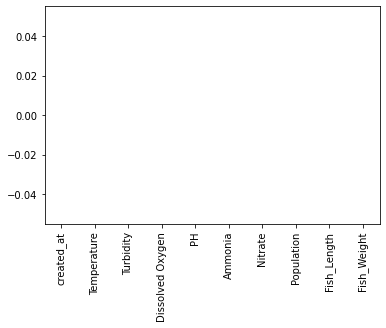

In [14]:
df_raw1.isna().sum().plot.bar()

No missing records

In [15]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

In [16]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [17]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [18]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,23.5000,30.0,0.723,9.02832,5.91560,285.0,75,7.3,3.2,2021-06-19 00:01:46,2021-06-19,00:01:46
1,23.5000,29.0,0.008,8.98746,5.80338,290.0,75,7.3,3.2,2021-06-19 00:02:05,2021-06-19,00:02:05
2,23.4375,29.0,1.365,9.04647,5.65000,302.0,75,7.3,3.2,2021-06-19 00:05:01,2021-06-19,00:05:01
3,23.4375,30.0,0.249,9.06009,5.54304,289.0,75,7.3,3.2,2021-06-19 00:10:14,2021-06-19,00:10:14
4,23.4375,30.0,1.892,9.11910,4.79604,297.0,75,7.3,3.2,2021-06-19 00:35:35,2021-06-19,00:35:35


Sort DataFrame by Date (Datetime)

In [19]:
df=df_raw1.sort_values(by='Datetime') 

In [ ]:
# df_raw1 = df_raw1.dropna()
#clean up missing data here
# df.ffill(axis=0,inplace=True)

In [20]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,91015.0000,91015.0000,91015.0000,91015.0000,91015.0000,91015.0000,91015.0000,91015.0000,91015.0000,91015
mean,24.5073,98.2932,10.4064,6.1928,inf,931.1267,75.0000,18.5971,88.9193,2021-08-01 19:32:10.481118464
min,22.5625,8.0000,0.0070,-3.1374,0.0001,89.0000,75.0000,7.3000,3.2000,2021-06-19 00:01:46
25%,23.8125,99.0000,4.4010,5.3559,0.0011,272.0000,75.0000,11.9300,15.8000,2021-07-03 15:39:32
50%,24.3125,100.0000,7.4970,7.1671,5.1949,432.0000,75.0000,17.3600,47.8500,2021-07-21 15:43:54
75%,25.2500,100.0000,14.2250,7.5666,23.4823,1759.0000,75.0000,28.7400,205.5500,2021-09-16 07:37:02
max,28.0625,100.0000,44.6350,9.1463,inf,2871.0000,75.0000,32.3700,304.7600,2021-10-13 03:15:56
std,0.9406,6.0931,8.9300,2.1065,nan,758.8938,0.0000,7.8634,86.7384,NaN


In [21]:
d=df["Date"].unique()
print(len(d))
d

89


array([datetime.date(2021, 6, 19), datetime.date(2021, 6, 20),
       datetime.date(2021, 6, 21), datetime.date(2021, 6, 22),
       datetime.date(2021, 6, 23), datetime.date(2021, 6, 24),
       datetime.date(2021, 6, 25), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 6, 30),
       datetime.date(2021, 7, 1), datetime.date(2021, 7, 2),
       datetime.date(2021, 7, 3), datetime.date(2021, 7, 4),
       datetime.date(2021, 7, 7), datetime.date(2021, 7, 8),
       datetime.date(2021, 7, 9), datetime.date(2021, 7, 10),
       datetime.date(2021, 7, 11), datetime.date(2021, 7, 12),
       datetime.date(2021, 7, 13), datetime.date(2021, 7, 14),
       datetime.date(2021, 7, 15), datetime.date(2021, 7, 16),
       datetime.date(2021, 7, 17), datetime.date(2021, 7, 18),
       datetime.date(2021, 7, 19), datetime.date(2021, 7, 20),
       datetime.date(2021, 7, 21), datetime.date(2021, 7, 22),
       datetime.date(2021, 7, 23), datetime.date(2021, 7, 24),

In [23]:
a=df["Fish_Weight"].unique()
print(len(a))
a

88


array([  3.2 ,   3.3 ,   4.2 ,   5.1 ,   6.  ,   6.9 ,   7.8 ,   8.7 ,
         9.6 ,  10.5 ,  11.4 ,  12.3 ,  15.8 ,  17.68,  19.56,  21.44,
        23.32,  25.2 ,  27.08,  28.96,  30.84,  32.72,  34.6 ,  36.48,
        38.36,  42.1 ,  43.39,  45.27,  46.56,  47.85,  49.14,  49.43,
        51.72,  53.01,  54.3 ,  55.59,  56.88,  58.17,  59.46,  60.2 ,
        64.33,  76.72,  80.85,  89.01,  93.14,  97.27, 103.4 , 107.53,
       110.66, 114.79, 118.  , 118.66, 119.32, 119.98, 120.64, 122.58,
       123.24, 130.98, 127.2 , 134.76, 138.54, 142.32, 146.1 , 149.88,
       200.46, 205.55, 210.64, 215.73, 220.82, 225.91, 231.  , 236.09,
       241.18, 246.27, 251.4 , 253.9 , 256.4 , 258.9 , 261.4 , 263.9 ,
       266.4 , 268.9 , 271.4 , 273.9 , 276.4 , 286.4 , 295.58, 304.76])

In [24]:
rec_From_the_Date=df[df["Date"]== d[0]]
rec_From_the_Date

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,23.5000,30.0,0.723,9.02832,5.91560,285.0,75,7.3,3.2,2021-06-19 00:01:46,2021-06-19,00:01:46
1,23.5000,29.0,0.008,8.98746,5.80338,290.0,75,7.3,3.2,2021-06-19 00:02:05,2021-06-19,00:02:05
2,23.4375,29.0,1.365,9.04647,5.65000,302.0,75,7.3,3.2,2021-06-19 00:05:01,2021-06-19,00:05:01
3,23.4375,30.0,0.249,9.06009,5.54304,289.0,75,7.3,3.2,2021-06-19 00:10:14,2021-06-19,00:10:14
4,23.4375,30.0,1.892,9.11910,4.79604,297.0,75,7.3,3.2,2021-06-19 00:35:35,2021-06-19,00:35:35
...,...,...,...,...,...,...,...,...,...,...,...,...
1729,26.0625,100.0,3.936,7.14898,4.24835,309.0,75,7.3,3.2,2021-06-19 23:57:53,2021-06-19,23:57:53
1730,26.0000,100.0,19.608,7.14444,4.23231,307.0,75,7.3,3.2,2021-06-19 23:58:49,2021-06-19,23:58:49
1731,26.0000,100.0,17.057,7.12628,4.53072,298.0,75,7.3,3.2,2021-06-19 23:59:09,2021-06-19,23:59:09
1732,26.0625,100.0,15.915,7.06727,4.46257,309.0,75,7.3,3.2,2021-06-19 23:59:29,2021-06-19,23:59:29


In [22]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = df.describe(datetime_is_numeric = True)

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,91015.0000,91015.0000,91015.0000,91015.0000,91015.0000,91015.0000,91015.0000,91015.0000,91015.0000,91015
mean,24.5073,98.2932,10.4064,6.1928,inf,931.1267,75.0000,18.5971,88.9193,2021-08-01 19:32:10.481118464
min,22.5625,8.0000,0.0070,-3.1374,0.0001,89.0000,75.0000,7.3000,3.2000,2021-06-19 00:01:46
25%,23.8125,99.0000,4.4010,5.3559,0.0011,272.0000,75.0000,11.9300,15.8000,2021-07-03 15:39:32
50%,24.3125,100.0000,7.4970,7.1671,5.1949,432.0000,75.0000,17.3600,47.8500,2021-07-21 15:43:54
75%,25.2500,100.0000,14.2250,7.5666,23.4823,1759.0000,75.0000,28.7400,205.5500,2021-09-16 07:37:02
max,28.0625,100.0000,44.6350,9.1463,inf,2871.0000,75.0000,32.3700,304.7600,2021-10-13 03:15:56
std,0.9406,6.0931,8.9300,2.1065,nan,758.8938,0.0000,7.8634,86.7384,NaN


We have no missing records now. Start dates and end dates are - 19th Jun,'21 and 13th Oct,'21 respectively.

In [27]:
df.to_csv('Data\Pond6.csv')

We do not have reading for an equal interval in a particular day . Also , we have missing dates where there was no reading taken between start date and end date.

In [28]:
df= pd.read_csv("Data\Pond6.csv", delimiter = ",",low_memory=False )

In [29]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [31]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,23.5000,30.0,0.723,9.02832,5.91560,285.0,75,7.3,3.2,2021-06-19 00:01:46,2021-06-19,00:01:46
1,23.5000,29.0,0.008,8.98746,5.80338,290.0,75,7.3,3.2,2021-06-19 00:02:05,2021-06-19,00:02:05
2,23.4375,29.0,1.365,9.04647,5.65000,302.0,75,7.3,3.2,2021-06-19 00:05:01,2021-06-19,00:05:01
3,23.4375,30.0,0.249,9.06009,5.54304,289.0,75,7.3,3.2,2021-06-19 00:10:14,2021-06-19,00:10:14
4,23.4375,30.0,1.892,9.11910,4.79604,297.0,75,7.3,3.2,2021-06-19 00:35:35,2021-06-19,00:35:35


In [32]:

df['Datetime'] = pd.to_datetime(df.Datetime,infer_datetime_format=True)
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time
df['Date_diff'] = df['Date'].diff()
# df['diff'] = df['diff'].fillna(0)



In [33]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,23.5000,30.0,0.723,9.02832,5.91560,285.0,75,7.3,3.2,2021-06-19 00:01:46,2021-06-19,00:01:46,NaT
1,23.5000,29.0,0.008,8.98746,5.80338,290.0,75,7.3,3.2,2021-06-19 00:02:05,2021-06-19,00:02:05,0 days
2,23.4375,29.0,1.365,9.04647,5.65000,302.0,75,7.3,3.2,2021-06-19 00:05:01,2021-06-19,00:05:01,0 days
3,23.4375,30.0,0.249,9.06009,5.54304,289.0,75,7.3,3.2,2021-06-19 00:10:14,2021-06-19,00:10:14,0 days
4,23.4375,30.0,1.892,9.11910,4.79604,297.0,75,7.3,3.2,2021-06-19 00:35:35,2021-06-19,00:35:35,0 days


In [34]:
df['Date_diff']=df['Date_diff'].astype('timedelta64[D]')

In [35]:
df['Date_diff'] = df['Date_diff'].fillna(0)

In [36]:
df.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
0,23.5000,30.0,0.723,9.02832,5.91560,285.0,75,7.3,3.2,2021-06-19 00:01:46,2021-06-19,00:01:46,0.0
1,23.5000,29.0,0.008,8.98746,5.80338,290.0,75,7.3,3.2,2021-06-19 00:02:05,2021-06-19,00:02:05,0.0
2,23.4375,29.0,1.365,9.04647,5.65000,302.0,75,7.3,3.2,2021-06-19 00:05:01,2021-06-19,00:05:01,0.0
3,23.4375,30.0,0.249,9.06009,5.54304,289.0,75,7.3,3.2,2021-06-19 00:10:14,2021-06-19,00:10:14,0.0
4,23.4375,30.0,1.892,9.11910,4.79604,297.0,75,7.3,3.2,2021-06-19 00:35:35,2021-06-19,00:35:35,0.0


In [37]:
df['Date_diff'].unique()

array([ 0.,  1.,  3.,  2.,  5., 10.,  6.])

In [38]:
p=df[df['Date_diff']>=2]
p       

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff
12278,24.2500,90.0,15.087,7.52575,23.78109,241.0,75,8.74,8.70,2021-06-28 11:44:33,2021-06-28,11:44:33,3.0
25817,23.6250,97.0,16.550,7.66648,21.23375,258.0,75,12.67,19.56,2021-07-07 09:49:48,2021-07-07,09:49:48,3.0
57478,24.1875,100.0,0.160,7.11266,0.00033,1929.0,75,19.52,76.72,2021-08-04 01:17:12,2021-08-04,01:17:12,3.0
57587,23.6250,100.0,3.276,6.96286,0.00024,1907.0,75,20.53,89.01,2021-08-07 23:15:51,2021-08-07,23:15:51,2.0
64497,23.8125,93.0,17.264,6.51345,0.00010,1699.0,75,23.96,122.58,2021-08-21 16:34:53,2021-08-21,16:34:53,3.0
64825,24.1250,100.0,0.659,5.36043,0.00060,1410.0,75,24.76,130.98,2021-08-27 11:01:26,2021-08-27,11:01:26,5.0
65876,23.6250,100.0,0.598,5.12892,0.00114,1488.0,75,25.55,142.32,2021-09-03 13:43:07,2021-09-03,13:43:07,2.0
66568,25.3125,100.0,0.152,5.34681,0.00239,1721.0,75,28.55,200.46,2021-09-15 13:02:42,2021-09-15,13:02:42,10.0
90708,28.0625,100.0,2.597,2.40524,0.00251,1853.0,75,32.12,286.40,2021-10-11 15:47:45,2021-10-11,15:47:45,6.0


In [39]:
df['Weight_diff'] = df['Fish_Weight'].diff()
df['Weight_diff'] = df['Weight_diff'].fillna(0)

In [40]:
df['Weight_diff'].unique()

array([ 0.  ,  0.1 ,  0.9 ,  0.9 ,  3.5 ,  1.88,  1.88,  1.88,  3.74,
        1.29,  0.29,  2.29,  1.29,  0.74,  4.13, 12.39,  8.16,  6.13,
        3.13,  4.13,  3.21,  0.66,  0.66,  1.94,  7.74, -3.78,  3.78,
        3.78, 50.58,  5.09,  5.09,  5.13,  2.5 ,  2.5 , 10.  ,  9.18])

In [41]:
date_group=df.groupby("Date", sort = False)

In [42]:
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-19,23.5000,30.0,0.723,9.02832,5.91560,285.0,75,7.30,3.20,2021-06-19 00:01:46,00:01:46,0.0,0.00
2021-06-20,26.0000,100.0,16.745,7.14898,4.46257,298.0,75,7.36,3.30,2021-06-20 00:00:08,00:00:08,1.0,0.10
2021-06-21,25.4375,100.0,37.084,7.22161,13.36644,278.0,75,7.69,4.20,2021-06-21 00:00:12,00:00:12,1.0,0.90
2021-06-22,23.9375,84.0,16.006,7.36233,0.23477,835.0,75,7.72,5.10,2021-06-22 13:01:19,13:01:19,1.0,0.90
2021-06-23,24.3750,100.0,12.534,7.44858,29.55264,272.0,75,8.05,6.00,2021-06-23 00:00:48,00:00:48,1.0,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-04,25.8750,100.0,2.146,2.57320,0.00144,1925.0,75,31.61,273.90,2021-10-04 02:31:50,02:31:50,1.0,2.50
2021-10-05,26.3125,100.0,1.187,2.16918,0.00105,2177.0,75,31.73,276.40,2021-10-05 00:09:03,00:09:03,1.0,2.50
2021-10-11,28.0625,100.0,2.597,2.40524,0.00251,1853.0,75,32.12,286.40,2021-10-11 15:47:45,15:47:45,6.0,10.00


Shifting the weight difference to the previous day recording since the weight recorded for the current day reflects previous day's water quality.

In [43]:
d=df["Date"].unique()
print(len(d))
d

89


array([datetime.date(2021, 6, 19), datetime.date(2021, 6, 20),
       datetime.date(2021, 6, 21), datetime.date(2021, 6, 22),
       datetime.date(2021, 6, 23), datetime.date(2021, 6, 24),
       datetime.date(2021, 6, 25), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 6, 30),
       datetime.date(2021, 7, 1), datetime.date(2021, 7, 2),
       datetime.date(2021, 7, 3), datetime.date(2021, 7, 4),
       datetime.date(2021, 7, 7), datetime.date(2021, 7, 8),
       datetime.date(2021, 7, 9), datetime.date(2021, 7, 10),
       datetime.date(2021, 7, 11), datetime.date(2021, 7, 12),
       datetime.date(2021, 7, 13), datetime.date(2021, 7, 14),
       datetime.date(2021, 7, 15), datetime.date(2021, 7, 16),
       datetime.date(2021, 7, 17), datetime.date(2021, 7, 18),
       datetime.date(2021, 7, 19), datetime.date(2021, 7, 20),
       datetime.date(2021, 7, 21), datetime.date(2021, 7, 22),
       datetime.date(2021, 7, 23), datetime.date(2021, 7, 24),

In [44]:
a=df["Fish_Weight"].unique()
print(len(a))
a

88


array([  3.2 ,   3.3 ,   4.2 ,   5.1 ,   6.  ,   6.9 ,   7.8 ,   8.7 ,
         9.6 ,  10.5 ,  11.4 ,  12.3 ,  15.8 ,  17.68,  19.56,  21.44,
        23.32,  25.2 ,  27.08,  28.96,  30.84,  32.72,  34.6 ,  36.48,
        38.36,  42.1 ,  43.39,  45.27,  46.56,  47.85,  49.14,  49.43,
        51.72,  53.01,  54.3 ,  55.59,  56.88,  58.17,  59.46,  60.2 ,
        64.33,  76.72,  80.85,  89.01,  93.14,  97.27, 103.4 , 107.53,
       110.66, 114.79, 118.  , 118.66, 119.32, 119.98, 120.64, 122.58,
       123.24, 130.98, 127.2 , 134.76, 138.54, 142.32, 146.1 , 149.88,
       200.46, 205.55, 210.64, 215.73, 220.82, 225.91, 231.  , 236.09,
       241.18, 246.27, 251.4 , 253.9 , 256.4 , 258.9 , 261.4 , 263.9 ,
       266.4 , 268.9 , 271.4 , 273.9 , 276.4 , 286.4 , 295.58, 304.76])

In [45]:
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],13]=date_group.get_group(d[i+1]).Weight_diff.max()
    print(df[df["Date"]==d[i]].iloc[0,13])
    
    

0.09999999999999964
0.9000000000000004
0.8999999999999995
0.9000000000000004
0.9000000000000004
0.8999999999999995
0.8999999999999995
0.9000000000000004
0.9000000000000004
0.9000000000000004
0.9000000000000004
3.5
1.879999999999999
1.8800000000000026
1.879999999999999
1.879999999999999
1.879999999999999
1.8800000000000026
1.879999999999999
1.879999999999999
1.8800000000000026
1.8799999999999955
1.8800000000000026
3.740000000000002
1.2899999999999991
1.8800000000000026
1.2899999999999991
1.2899999999999991
1.2899999999999991
0.28999999999999915
2.289999999999999
1.2899999999999991
1.2899999999999991
1.2900000000000063
1.2899999999999991
1.2899999999999991
1.2899999999999991
0.740000000000002
4.1299999999999955
12.39
4.1299999999999955
8.16000000000001
4.1299999999999955
4.1299999999999955
6.13000000000001
4.1299999999999955
3.1299999999999955
4.13000000000001
3.2099999999999937
0.6599999999999966
0.6599999999999966
0.6600000000000108
0.6599999999999966
1.9399999999999977
7.7399999999999

In [46]:
date_group=df.groupby("Date", sort = False)
date_group.first()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-19,23.5000,30.0,0.723,9.02832,5.91560,285.0,75,7.30,3.20,2021-06-19 00:01:46,00:01:46,0.0,0.10
2021-06-20,26.0000,100.0,16.745,7.14898,4.46257,298.0,75,7.36,3.30,2021-06-20 00:00:08,00:00:08,1.0,0.90
2021-06-21,25.4375,100.0,37.084,7.22161,13.36644,278.0,75,7.69,4.20,2021-06-21 00:00:12,00:00:12,1.0,0.90
2021-06-22,23.9375,84.0,16.006,7.36233,0.23477,835.0,75,7.72,5.10,2021-06-22 13:01:19,13:01:19,1.0,0.90
2021-06-23,24.3750,100.0,12.534,7.44858,29.55264,272.0,75,8.05,6.00,2021-06-23 00:00:48,00:00:48,1.0,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-04,25.8750,100.0,2.146,2.57320,0.00144,1925.0,75,31.61,273.90,2021-10-04 02:31:50,02:31:50,1.0,2.50
2021-10-05,26.3125,100.0,1.187,2.16918,0.00105,2177.0,75,31.73,276.40,2021-10-05 00:09:03,00:09:03,1.0,10.00
2021-10-11,28.0625,100.0,2.597,2.40524,0.00251,1853.0,75,32.12,286.40,2021-10-11 15:47:45,15:47:45,6.0,9.18


In [47]:
dates_to_be_dropped=[]
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],12]=date_group.get_group(d[i+1]).Date_diff.max()
    print(d[i],'------' ,df[df["Date"]==d[i]].iloc[0,12])
    if (df[df["Date"]==d[i]].iloc[0,12])>=2:
        dates_to_be_dropped.append(d[i]) 

2021-06-19 ------ 1.0
2021-06-20 ------ 1.0
2021-06-21 ------ 1.0
2021-06-22 ------ 1.0
2021-06-23 ------ 1.0
2021-06-24 ------ 1.0
2021-06-25 ------ 3.0
2021-06-28 ------ 1.0
2021-06-29 ------ 1.0
2021-06-30 ------ 1.0
2021-07-01 ------ 1.0
2021-07-02 ------ 1.0
2021-07-03 ------ 1.0
2021-07-04 ------ 3.0
2021-07-07 ------ 1.0
2021-07-08 ------ 1.0
2021-07-09 ------ 1.0
2021-07-10 ------ 1.0
2021-07-11 ------ 1.0
2021-07-12 ------ 1.0
2021-07-13 ------ 1.0
2021-07-14 ------ 1.0
2021-07-15 ------ 1.0
2021-07-16 ------ 1.0
2021-07-17 ------ 1.0
2021-07-18 ------ 1.0
2021-07-19 ------ 1.0
2021-07-20 ------ 1.0
2021-07-21 ------ 1.0
2021-07-22 ------ 1.0
2021-07-23 ------ 1.0
2021-07-24 ------ 1.0
2021-07-25 ------ 1.0
2021-07-26 ------ 1.0
2021-07-27 ------ 1.0
2021-07-28 ------ 1.0
2021-07-29 ------ 1.0
2021-07-30 ------ 1.0
2021-07-31 ------ 1.0
2021-08-01 ------ 3.0
2021-08-04 ------ 1.0
2021-08-05 ------ 2.0
2021-08-07 ------ 1.0
2021-08-08 ------ 1.0
2021-08-09 ------ 1.0
2021-08-10

In [48]:
dates_to_be_dropped.append(d[len(date_group)-1])  
dates_to_be_dropped

[datetime.date(2021, 6, 25),
 datetime.date(2021, 7, 4),
 datetime.date(2021, 8, 1),
 datetime.date(2021, 8, 5),
 datetime.date(2021, 8, 18),
 datetime.date(2021, 8, 22),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 9, 5),
 datetime.date(2021, 10, 5),
 datetime.date(2021, 10, 13)]

In [49]:
# df.iloc[df.loc[df["Date_diff"]>=2.index[0],12]
# #         print(df.iloc[df.loc[df["Date"]==d[i]].index[0],12])
# #         print(d[i])
# # print(i)
i=0
for i in range(len(dates_to_be_dropped)):
    m=df.loc[df["Date"]==dates_to_be_dropped[i]].index
    df.drop(m,inplace=True)
    df.reset_index()

In [50]:
df.tail(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time,Date_diff,Weight_diff
90986,27.0625,100.0,2.409,2.16011,0.00163,1767.0,75,32.37,295.58,2021-10-12 23:36:04,2021-10-12,23:36:04,0.0,0.0
90987,27.0000,100.0,0.824,2.16918,0.00157,1785.0,75,32.37,295.58,2021-10-12 23:44:54,2021-10-12,23:44:54,0.0,0.0
90988,27.0000,100.0,0.412,2.16464,0.00163,1755.0,75,32.37,295.58,2021-10-12 23:45:13,2021-10-12,23:45:13,0.0,0.0
90989,26.9375,100.0,1.332,2.16464,0.00157,1757.0,75,32.37,295.58,2021-10-12 23:45:52,2021-10-12,23:45:52,0.0,0.0
90990,27.0000,100.0,0.709,2.15557,0.00152,1792.0,75,32.37,295.58,2021-10-12 23:50:43,2021-10-12,23:50:43,0.0,0.0


In [51]:
df.drop("Date_diff",axis=1,inplace=True)


In [52]:
df.to_csv('cleaned_Pond6.csv')